# LAB 2

Author: Sophiya Mehra

Date: 3/28/25

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from scipy.integrate import solve_ivp

## Part 1: The Ideal Case

In [2]:
# how long test mass take to reach bottom of 4 km shaft with no drag

# equation is x = v0t + 0.5*a*t^2 --> v0 is 0 so t = sqrt(x/(0.5a))
g0 = 9.81 # m/s^2
x = 4000 # m
t_bottom = np.sqrt(x/(0.5*g0))

print(f"It will take {t_bottom} seconds for the test mass to reach the bottom of the shaft.")

It will take 28.55686245854129 seconds for the test mass to reach the bottom of the shaft.


*Reducing eq 1 into a system of coupled first order diff eq*

Eq 1: $\frac{d^2y}{dt^2} = -g+\alpha(\frac{dy}{dt})^\gamma$

Let $v=\frac{dy}{dt}$

Thus we get:

$v=\frac{dy}{dt}$

$\frac{dv}{dt} = -g+\alpha(v)^\gamma$

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e-02 ...  2.997e+01  3.000e+01]
        y: [[ 4.000e+03  4.000e+03 ... -4.057e+02 -4.145e+02]
            [ 0.000e+00 -2.946e-01 ... -2.940e+02 -2.943e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 1.364e-12, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The mass hits the bottom after 28.55686245854129 seconds.
Compared to the analytic calculaiton, the two times are exactly the same up to the precision of the solver.


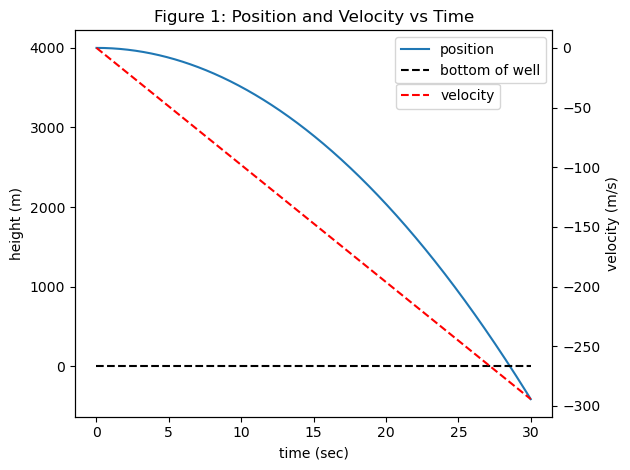

In [3]:
# solving eq 1 with alpha = 0 (aka no drag)

# thing 1:
def derivatives(t,s):
    y, v = s
    dydt = v
    dvdt = -g0
    return [dydt,dvdt]

# thing 2: initial and final x-values
t0 = 0 # sec
tf = 30 # sec
t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
#defining initial height as height above bottom of shaft with bottom of shaft at 0
ics = [4000,0] # initial position (m) and velocity (m/s) respectively

# event for reaching the bottom of the shaft
def stop(t,s):
    return s[0]

# solve
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = stop)
print(soln)

# plot up
t = soln.t # time (s)
x = soln.y[0] # height (m)
y = soln.y[1] # velocity (m/s)
t_event = soln.t_events[0][0]
print(f"The mass hits the bottom after {t_event} seconds.")

print(f"Compared to the analytic calculaiton, the two times are exactly the same up to the precision of the solver.")

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, x,label='position')
ax2.plot(t, y,'--', color = 'red', label='velocity')
ax.set_xlabel('time (sec)')
ax.set_ylabel('height (m)')
ax2.set_ylabel('velocity (m/s)')
ax.set_title('Figure 1: Position and Velocity vs Time')
ax.hlines(0, t0, tf,linestyles='dashed', color = 'black', label = "bottom of well")
fig.tight_layout()
ax.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(0.905, 0.88))

## Part 2: Including Drag and a Variable g

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.003e-02 ...  2.850e+01  2.853e+01]
        y: [[ 4.000e+03  4.000e+03 ...  1.425e+01  5.847e+00]
            [ 0.000e+00 -2.948e-01 ... -2.797e+02 -2.800e+02]]
      sol: None
 t_events: [array([ 2.855e+01])]
 y_events: [array([[ 4.547e-13, -2.802e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The mass hits the bottom after 28.549403257169878 seconds.


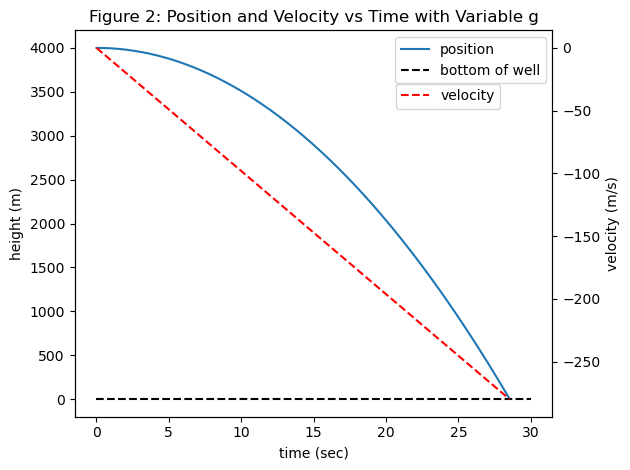

In [4]:
# including drag

# gravitational constant as function of dist from center of earth

R_earth = 6378.1*10**3 # m
def g(y):
    r = R_earth + y # height above bottom of shaft with bottom of shaft at 0
    return g0 * (r/R_earth)

# thing 1:
def derivatives2(t,s):
    y, v = s
    dydt = v
    dvdt = -g(y)
    return [dydt,dvdt]

# thing 3: initial conditions
ics = [4000,0] # initial position (m) and velocity (m/s) respectively

# event for reaching the bottom of the shaft
def stop2(t,s):
    return s[0]
# stopping when the mass hits the bottom
stop2.terminal = True

# solve
soln2 = solve_ivp(fun = derivatives2, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = stop2)
print(soln2)

# plot up
t2 = soln2.t # time (s)
x2 = soln2.y[0] # height (m)
y2 = soln2.y[1] # velocity (m/s)
t_event2 = soln2.t_events[0][0]

print(f"The mass hits the bottom after {t_event2} seconds.")

fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.plot(t2, x2,label='position')
ax4.plot(t2, y2,'--', color = 'red', label='velocity')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('height (m)')
ax4.set_ylabel('velocity (m/s)')
ax3.set_title('Figure 2: Position and Velocity vs Time with Variable g')
ax3.hlines(0, t0, tf,linestyles='dashed', color = 'black', label = "bottom of well")
fig.tight_layout()
ax3.legend(loc='upper right')
ax4.legend(loc='upper right', bbox_to_anchor=(0.905, 0.88))

Incorporating a time-dependent g decreases the fall time. Without time dependence, it takes 28.557 seconds to reach the bottom of the well, but with time-dependence, it takes 28.549 seconds. This is because as the object falls, the acceleration increases a very small amount, so it ends up falling "faster", making it take less time to get to the bottom of the well.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.009e-02 ...  8.991e+01  9.000e+01]
        y: [[ 4.000e+03  4.000e+03 ... -2.801e+02 -2.845e+02]
            [ 0.000e+00 -8.842e-01 ... -4.951e+01 -4.951e+01]]
      sol: None
 t_events: [array([ 8.425e+01])]
 y_events: [array([[-5.684e-14, -4.947e+01]])]
     nfev: 134
     njev: 0
      nlu: 0
The mass hits the bottom after 84.25227536391695 seconds.
Terminal velocity: -49.51385925172602 m/s


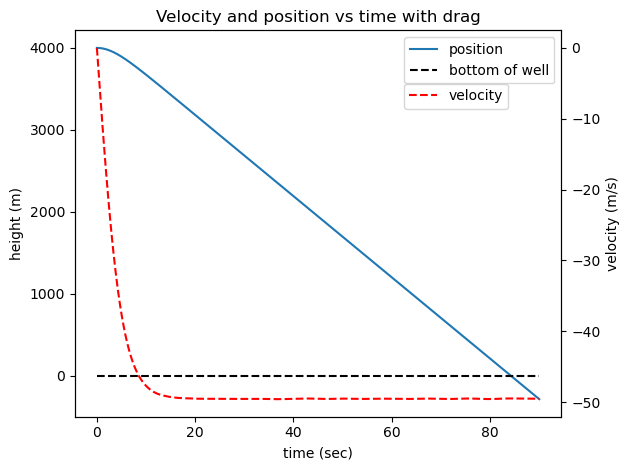

In [5]:
# including drag

# calibrate alpha so vterminal is 50 m/s
# bottom of shaft is 0 --> plotting height above bottom of the shaft
alpha = 0.004
gamma = 2
def derivatives3(t,s):
    y, v = s
    dydt = v
    dvdt = -g(y) + alpha*(v)**(gamma)
    return [dydt,dvdt]

# thing 2: initial and final x-values
t0d = 0 # sec
tfd = 90 # sec
t_evald = np.linspace(t0d,tfd,1000)

# thing 3: initial conditions
ics = [4000,0] # initial position (m) and velocity (m/s) respectively

# event when mass hits the bottom of the shaft
def stop3(t,s):
    return s[0] 

# solve
soln3 = solve_ivp(fun = derivatives3, t_span = (t0d,tfd), y0=ics, t_eval = t_evald, events = stop3)
print(soln3)

# plot up
t3 = soln3.t # time (s)
x3 = soln3.y[0] # height (m)
y3 = soln3.y[1] # velocity (m/s)
t_event3 = soln3.t_events[0][0]

print(f"The mass hits the bottom after {t_event3} seconds.")

v_terminal = y3[-1]
print(f"Terminal velocity: {v_terminal} m/s")

fig, ax5 = plt.subplots()
ax6 = ax5.twinx()
ax5.plot(t3, x3,label='position')
ax6.plot(t3, y3,'--', color = 'red', label='velocity')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('height (m)')
ax6.set_ylabel('velocity (m/s)')
ax5.set_title('Velocity and position vs time with drag')
ax5.hlines(0, t0d, tfd,linestyles='dashed', color = 'black', label = "bottom of well")
fig.tight_layout()
ax5.legend(loc='upper right')
ax6.legend(loc='upper right', bbox_to_anchor=(0.905, 0.88))

You can calibrate $\alpha$ by putting an $\alpha$ into the ODE that will result in a terminal velocity of 50 m/s. I achieved this by guessing and checking my terminal velocity until it was 50 m/s.

Drag increases the fall time because it makes the object fall "slower" so it takes longer to reach the bottom of the well. This is because drag decreases the acceleration due to gravity, so the object doesn't fall as fast.

## Part 3: The Coriolis Force

Eq: $\frac{dv}{dt} = -g+\alpha(v)^\gamma + 2\Omega \times v$

$\frac{dy}{dt} = v_y$

$\frac{dv_y}{dt} = -g+\alpha(v_y)^\gamma - 2\Omega*v_x$

$\frac{dv_x}{dt} = 2\Omega*v_y$

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.009e-02 ...  2.838e+01  2.847e+01]
        y: [[ 0.000e+00 -1.740e-07 ... -5.437e+00 -5.489e+00]
            [ 4.000e+03  4.000e+03 ...  4.778e+01  2.265e+01]
            [ 0.000e+00 -5.794e-06 ... -5.748e-01 -5.785e-01]
            [ 0.000e+00 -8.843e-01 ... -2.785e+02 -2.794e+02]]
      sol: None
 t_events: [array([ 2.190e+01]), array([ 2.855e+01])]
 y_events: [array([[-2.500e+00,  1.646e+03, -3.424e-01, -2.150e+02]]), array([[-5.536e+00,  4.547e-13, -5.818e-01, -2.802e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The mass hits the side after 21.902828841062014 seconds
Depth of mass when hits side: 1645.5762350783186 m
The mass hits the bottom after 28.549424018741576 seconds.


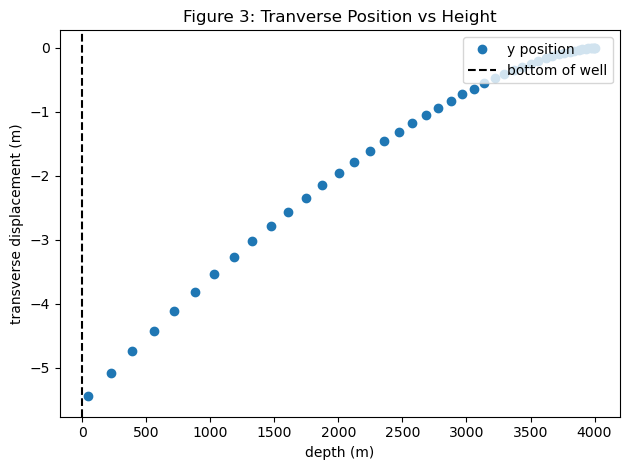

In [6]:
# adding on coriolis force
# bottom of shaft is at 0 height
w = 7.272 * 10**(-5) # rad/s
def derivatives4(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    dvydt = -g(y) + 0*(vy)**(gamma) - 2*w*vx
    dvxdt = 2*w*vy
    return [dxdt,dydt,dvxdt,dvydt]

# thing 2: initial and final x-values
t0d = 0 # sec
tfd = 90 # sec
t_evald = np.linspace(t0d,tfd,1000)

# thing 3: initial conditions
ics = [0,4000,0,0] # initial positions (m) and velocities (m/s) respectively

# event for when mass hits the side of the shaft
def stop_side(t,s):
    return s[0]+2.5
stop_side.terminal = False
# event for when mass hits the bottom of the shaft
def stop4(t,s):
    return s[1]
stop4.terminal = True

# solve
soln4 = solve_ivp(fun = derivatives4, t_span = (t0d,tfd), y0=ics, t_eval = t_evald, events = [stop_side,stop4])
print(soln4)

# plot up
t4 = soln4.t # time (s)
x4 = soln4.y[0] # transverse displacement (m)
y4 = soln4.y[1] # height above bottom of shaft (m)
vx4 = soln4.y[2] # x velocity (m/s)
vy4 = soln4.y[3] # y velocity (m/s)
t_event_side = soln4.t_events[0][0]
t_event4 = soln4.t_events[1][0]
depth_side = soln4.y_events[0][0][1]
print(f"The mass hits the side after {t_event_side} seconds")
print(f"Depth of mass when hits side: {depth_side} m")
print(f"The mass hits the bottom after {t_event4} seconds.")

fig, ax7 = plt.subplots()
ax7.plot(y4, x4,'o',label='y position',markevery=7)
ax7.set_xlabel('depth (m)')
ax7.set_ylabel('transverse displacement (m)')
ax7.set_title('Figure 3: Tranverse Position vs Height')
ax7.axvline(0,linestyle='dashed', color = 'black', label = "bottom of well")
fig.tight_layout()
ax7.legend(loc='upper right')

If you drop the test mass from the center, the test mass bumps the wall first because it takes 21.9 sec to hit the wall, while it takes 28.5 sec for the test mass to reach the bottom.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.009e-02 ...  8.991e+01  9.000e+01]
        y: [[ 0.000e+00 -1.740e-07 ... -2.693e+01 -2.699e+01]
            [ 4.000e+03  4.000e+03 ... -2.802e+02 -2.846e+02]
            [ 0.000e+00 -5.793e-06 ... -6.225e-01 -6.232e-01]
            [ 0.000e+00 -8.842e-01 ... -4.950e+01 -4.950e+01]]
      sol: None
 t_events: [array([ 2.967e+01]), array([ 8.425e+01])]
 y_events: [array([[-2.500e+00,  2.703e+03, -1.886e-01, -4.954e+01]]), array([[-2.352e+01,  2.274e-13, -5.818e-01, -4.946e+01]])]
     nfev: 134
     njev: 0
      nlu: 0
The mass hits the side after 29.674574795470118 seconds
Depth of mass when hits side with drag: 2703.2417408790247 m
The mass hits the bottom after 84.25023855926673 seconds.


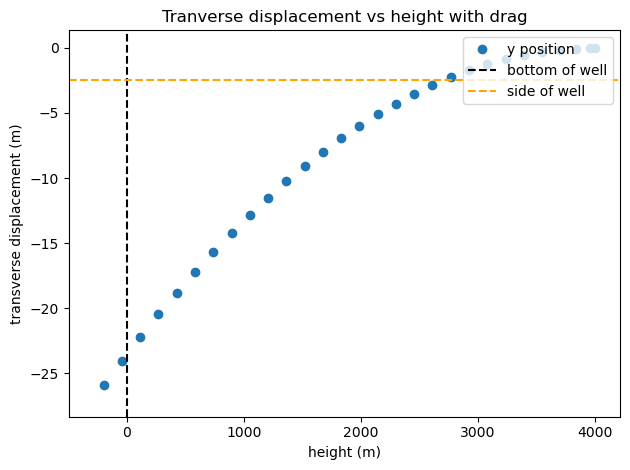

In [7]:
# adding drag back in
w = 7.272 * 10**(-5) # rad/s
def derivatives4(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    dvydt = -g(y) + alpha*(vy)**(gamma) - 2*w*vx
    dvxdt = 2*w*vy
    return [dxdt,dydt,dvxdt,dvydt]

# thing 2: initial and final x-values
t0d = 0 # sec
tfd = 90 # sec
t_evald = np.linspace(t0d,tfd,1000)

# thing 3: initial conditions
ics = [0,4000,0,0] # initial positions (m) and velocities (m/s) respectively

#event when mass hits the side
def stop_side1(t,s):
    return s[0]+2.5
stop_side.terminal = False
# event when mass hits the bottom
def stop5(t,s):
    return s[1]
stop4.terminal = True

# solve
soln4 = solve_ivp(fun = derivatives4, t_span = (t0d,tfd), y0=ics, t_eval = t_evald, events = [stop_side1,stop5])
print(soln4)

# plot up
t4 = soln4.t # time (s)
x4 = soln4.y[0] # transverse displacement (m)
y4 = soln4.y[1] # height above bottom of shaft (m)
vx4 = soln4.y[2] # x velocity (m/s)
vy4 = soln4.y[3] # y velocity (m/s)
t_event_side = soln4.t_events[0][0]
t_event4 = soln4.t_events[1][0]
depth_side_drag = soln4.y_events[0][0][1]
print(f"The mass hits the side after {t_event_side} seconds")
print(f"Depth of mass when hits side with drag: {depth_side_drag} m")
print(f"The mass hits the bottom after {t_event4} seconds.")

fig, ax9 = plt.subplots()
ax9.plot(y4, x4,'o',label='y position',markevery=35)
ax9.set_xlabel('height (m)')
ax9.set_ylabel('transverse displacement (m)')
ax9.set_title('Tranverse displacement vs height with drag')
ax9.axvline(0,linestyle='dashed', color = 'black', label = "bottom of well")
ax9.axhline(-2.5,linestyle='dashed', color = 'orange', label = "side of well")
fig.tight_layout()
ax9.legend(loc='upper right')

Drag doesn't really make a difference in the outcome because the object still hits the side wall first. However, drag makes the object fall much slower, so it won't have transversed as deep into the well when it hits the wall and also, it takes longer for the object to hit the side of the wall (29.7 sec with drag vs 21.9 sec without drag).

## Part 4: An infinitely deep mine

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.006e+00 ...  5.994e+03  6.000e+03]
        y: [[ 0.000e+00 -1.769e+02 ... -3.776e+06 -3.819e+06]
            [ 0.000e+00 -5.892e+01 ... -7.222e+03 -7.246e+03]]
      sol: None
 t_events: [array([ 1.267e+03,  3.800e+03]), array([ 2.482e+03,  2.584e+03])]
 y_events: [array([[-6.378e+06, -7.910e+03],
                  [-6.378e+06,  7.910e+03]]), array([[-1.274e+07, -5.000e+02],
                  [-1.274e+07,  5.000e+02]])]
     nfev: 1430
     njev: 0
      nlu: 0
The mass reaches the center of the Earth after 1266.5753611717416 seconds.
The velocity of the mass as it reaches the center of the Earth is -7910.0670665693215 m/s.
The mass reaches the other side of the Earth after 2482.145627806271 seconds.


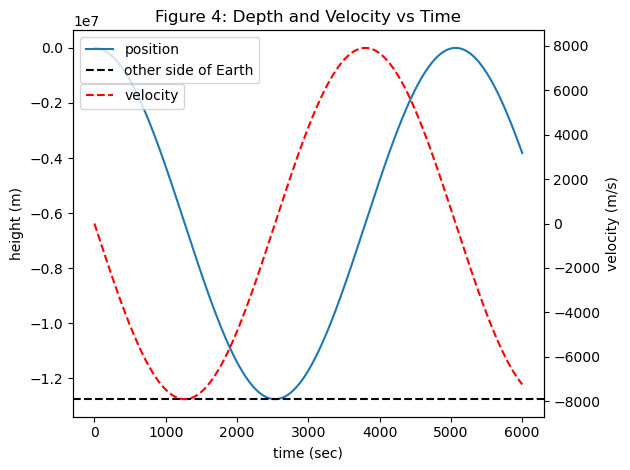

In [8]:
# plotting depth and velocity as func of time
# NEW coordinate system with surface of the Earth is at 0 height and any depth is now negative
R_earth = 6378.1*10**3 # m - radius of Earth
D_earth = R_earth*2 # m - diameter of Earth
def gnew(y_depth):
    r = R_earth - abs(y_depth) # distance from center of the Earth
    return g0 * (r/R_earth)

# thing 1:
def derivatives5(t,s):
    y_depth, v = s
    dydt = v
    dvdt = -gnew(y_depth)
    return [dydt,dvdt]

# thing 2: initial and final x-values
t0 = 0 # sec
tf = 6000 # sec
t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
ics = [0,0] # initial position (m) and velocity (m/s) respectively

# event when object reaches center of the Earth
def stop6(t,s):
    return s[0]+R_earth
# event when object reaches other side of Earth
def stop7(t,s):
    return s[0]+D_earth*0.999

# solve
soln5 = solve_ivp(fun = derivatives5, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = [stop6,stop7],rtol=1e-10,atol=1e-10)
print(soln5)

# plot up
t5 = soln5.t # time (s)
x5 = soln5.y[0] # depth (m)
y5 = soln5.y[1] # velocity (m/s)
t_event5 = soln5.t_events[0][0]
t_event6 = soln5.t_events[1][0]
velocity_event5 = soln5.y_events[0][0][1]

print(f"The mass reaches the center of the Earth after {t_event5} seconds.")
print(f"The velocity of the mass as it reaches the center of the Earth is {velocity_event5} m/s.")
print(f"The mass reaches the other side of the Earth after {t_event6} seconds.")

fig, ax11 = plt.subplots()
ax12 = ax11.twinx()
ax11.plot(t5, x5,label='position')
ax12.plot(t5, y5,'--', color = 'red', label='velocity')
ax11.set_xlabel('time (sec)')
ax11.set_ylabel('height (m)')
ax12.set_ylabel('velocity (m/s)')
ax11.set_title('Figure 4: Depth and Velocity vs Time')
ax11.axhline(-2*R_earth,linestyle='dashed', color = 'black', label = "other side of Earth")
fig.tight_layout()
ax11.legend(loc='upper left')
ax12.legend(loc='upper left', bbox_to_anchor=(0.0, 0.88))

In [9]:
# comparing crossing time to orbital period
M_earth = 5.972e24 # kg - mass of Earth
G = 6.6743e-11 #m^3 kg s^-2 - gravitational constant
v_orbital = np.sqrt(G*M_earth / R_earth) # m/s
orbital_period = 2*np.pi*R_earth /v_orbital # sec

print(f"The orbital period is {orbital_period} seconds.")
compare = orbital_period / t_event6

print(f"comparison: orbital period / crossing time = {compare}")

The orbital period is 5069.371199675785 seconds.
comparison: orbital period / crossing time = 2.0423343186983405


The crossing time is about 1/2 of the orbital period.

## Part 5: A non-uniform Earth

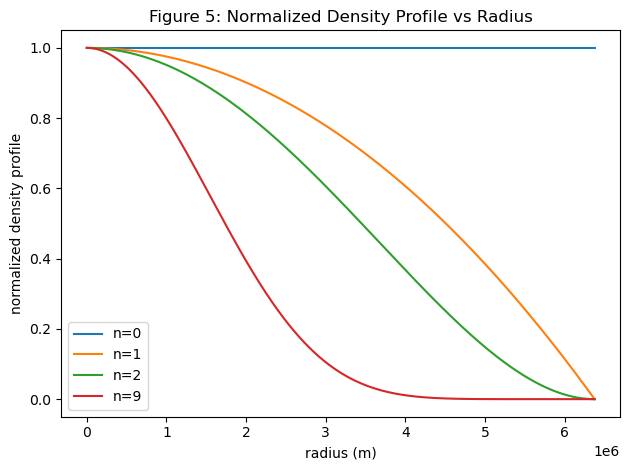

In [10]:
# plotting normalized density profile

# function takes in values from 0 - Rearth
def p(r,n):
    r_norm = r/R_earth # normalize radius inputs to become between 0 and 1
    return (1-r_norm**2)**n

radius = np.linspace(0,R_earth,1000)

p_0 = p(radius,0)
p_1 = p(radius,1)
p_2 = p(radius,2)
p_9 = p(radius,9)

fig, ax13 = plt.subplots()
ax13.plot(radius,p_0, label = 'n=0')
ax13.plot(radius,p_1, label = 'n=1')
ax13.plot(radius,p_2, label = 'n=2')
ax13.plot(radius,p_9, label = 'n=9')
ax13.set_title("Figure 5: Normalized Density Profile vs Radius")
ax13.set_xlabel('radius (m)')
ax13.set_ylabel('normalized density profile')
ax13.legend()
fig.tight_layout()

p0:5494.8674095512
p1:13737.168523878001
p2:24040.044916786497
p9:135545.12141863425


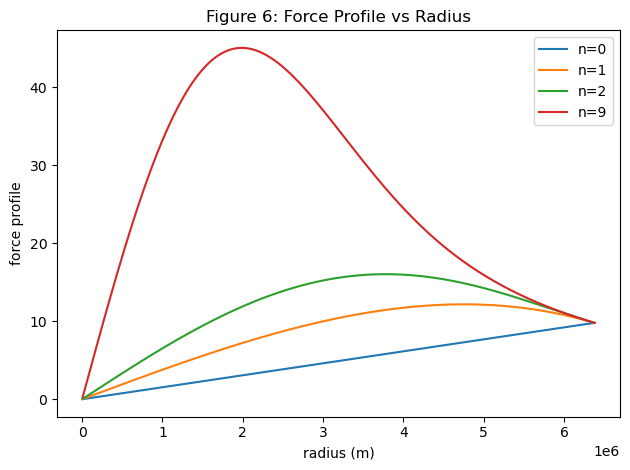

In [11]:
# plotting force profile as a function of radius
# what goes inside the integral
def M(r,n): # takes in radius from 0 to Rearth
    return p(r,n) * r**2
# integrating over function M to get mass and build force array for n=0,1,2,9

R = np.linspace(0,R_earth,1000)
force_profile_0 = []
for i in R[1:]:
    mass, err = quad(M, 0, i, args=(0,))
    value = G*4*np.pi*mass / (i**2)
    force_profile_0.append(value)
force_profile_0 = np.array(force_profile_0)
# normalizing coefficients p0
pn0 = M_earth / (4*np.pi * quad(M,0,R_earth,args=(0,))[0])
print(f"p0:{pn0}")


force_profile_1 = []

for i in R[1:]:
    mass, err = quad(M, 0, i, args=(1,))
    value = G*4*np.pi*mass / (i**2)
    force_profile_1.append(value)
force_profile_1 = np.array(force_profile_1)
# normalizing coefficients p1
pn1 = M_earth / (4*np.pi * quad(M,0,R_earth,args=(1,))[0])
print(f"p1:{pn1}")

force_profile_2 = []

for i in R[1:]:
    mass, err = quad(M, 0, i, args=(2,))
    value = G*4*np.pi*mass / (i**2)
    force_profile_2.append(value)
force_profile_2 = np.array(force_profile_2)
# normalizing coefficients p2
pn2 = M_earth / (4*np.pi * quad(M,0,R_earth,args=(2,))[0])
print(f"p2:{pn2}")

force_profile_9 = []

for i in R[1:]:
    mass, err = quad(M, 0, i, args=(9,))
    value = G*4*np.pi*mass / (i**2)
    force_profile_9.append(value)
force_profile_9 = np.array(force_profile_9)
# normalizing coefficients p9
pn9 = M_earth / (4*np.pi * quad(M,0,R_earth,args=(9,))[0])
print(f"p9:{pn9}")

fig, ax15 = plt.subplots()
ax15.plot(R[1:],pn0*force_profile_0, label = 'n=0')
ax15.plot(R[1:],pn1*force_profile_1, label = 'n=1')
ax15.plot(R[1:],pn2*force_profile_2, label = 'n=2')
ax15.plot(R[1:],pn9*force_profile_9, label = 'n=9')
ax15.set_title("Figure 6: Force Profile vs Radius")
ax15.set_xlabel('radius (m)')
ax15.set_ylabel('force profile')
ax15.legend()
fig.tight_layout()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 0.000e+00 -4.909e+02 ... -1.051e+05 -9.131e+04]
            [ 0.000e+00 -9.808e+01 ...  1.424e+03  1.327e+03]]
      sol: None
 t_events: [array([ 1.267e+03,  3.801e+03,  6.335e+03,  8.869e+03]), array([ 0.000e+00,  2.534e+03,  5.068e+03,  7.602e+03])]
 y_events: [array([[-6.378e+06, -7.906e+03],
                  [-6.378e+06,  7.905e+03],
                  [-6.378e+06, -7.906e+03],
                  [-6.378e+06,  7.904e+03]]), array([[ 0.000e+00,  0.000e+00],
                  [-1.276e+07,  1.819e-12],
                  [-2.783e+02, -4.547e-12],
                  [-1.276e+07,  1.228e-11]])]
     nfev: 146
     njev: 0
      nlu: 0
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
      

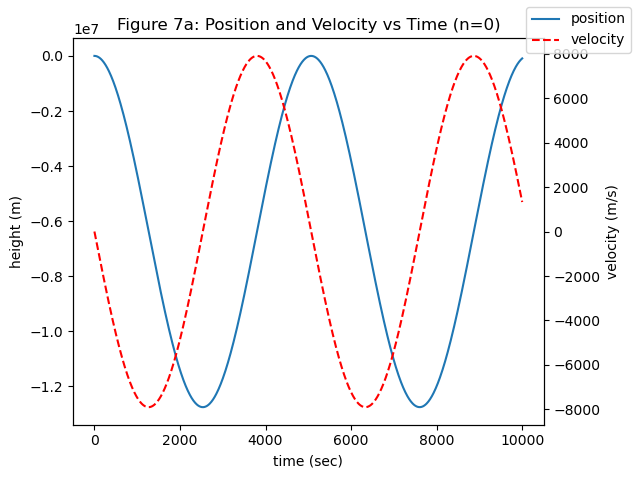

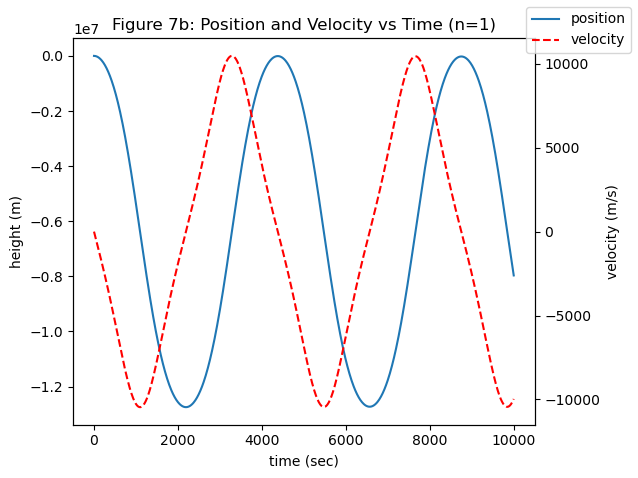

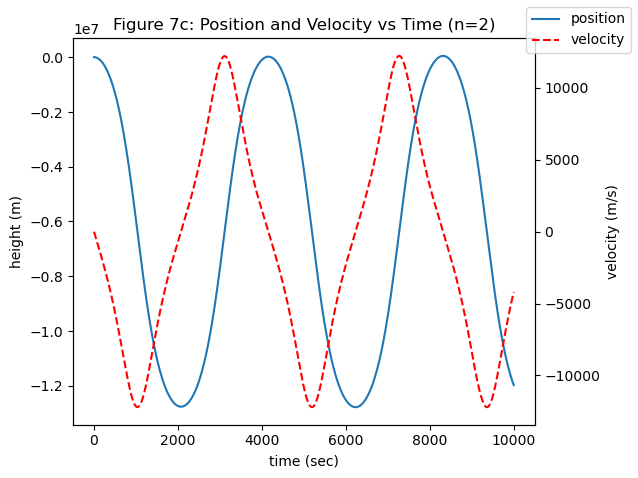

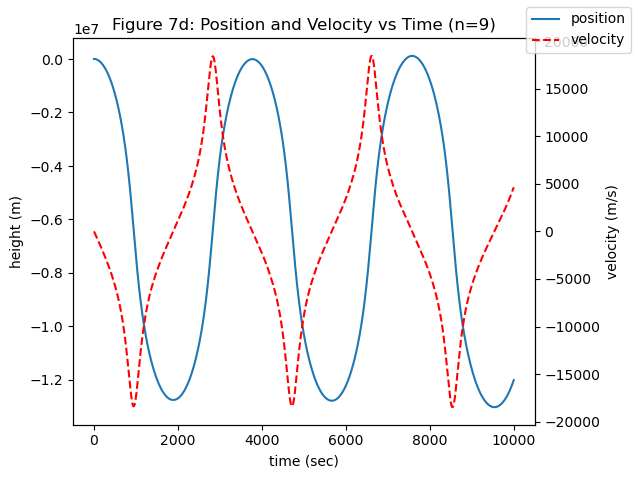

In [12]:
# plot position and velocity as function of time
# defining force function to use for solve_ivp to get position and velocity
def force(r,n):
    mass, err = quad(M, 0, r, args=(n,))
    value = G*4*np.pi*mass / (r**2)
    return value
R = np.linspace(0,R_earth,1000)[1:]

# thing 1:

pn = [pn0, pn1, pn2, 0, 0, 0, 0,0,0,pn9]
def derivatives_n0(t,s,n):
    y, v = s
    r = R_earth - abs(y)
    dydt = v
    dvdt = -pn[n]*force(r,n)
    return [dydt,dvdt]

# thing 2: initial and final x-values
t0 = 0 # sec
tf = 10000 # sec
t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
ics = [0.000,0] # initial position (m) and velocity (m/s) respectively

# event when mass reaches center of earth
def stop_n0(t,s,n):
    return s[0]+R_earth

stop_n0.terminal = False
# event when mass goes to velocity 0 m/s
def stop_crossing_time(t,s,n):
    return s[1]

# solve
soln_n0 = solve_ivp(fun = derivatives_n0, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = [stop_n0,stop_crossing_time], args=(0,))
print(soln_n0)

soln_n1 = solve_ivp(fun = derivatives_n0, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = stop_n0, args=(1,))
print(soln_n1)

soln_n2 = solve_ivp(fun = derivatives_n0, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = stop_n0, args=(2,))
print(soln_n2)

soln_n9 = solve_ivp(fun = derivatives_n0, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = [stop_n0,stop_crossing_time], args=(9,))
print(soln_n9)

# plot up
t_n0 = soln_n0.t # time (s)
x_n0 = soln_n0.y[0] # depth (m)
y_n0 = soln_n0.y[1] # velocity (m/s)
t_event_n0 = soln_n0.t_events[0][0]
velocity_event_n0 = soln_n0.y_events[0][0][1]
t_event_crossing_time_n0 = soln_n0.t_events[1][1]

print(f"The mass reaches the center of the Earth after {t_event_n0} seconds.")
print(f"The velocity of the mass as it reaches the center of the Earth is {velocity_event_n0} m/s.")
print(f"Crossing time for n=0: {t_event_crossing_time_n0} seconds.")


fig, ax16 = plt.subplots()
ax17 = ax16.twinx()
ax16.plot(t_n0, x_n0,label='position')
ax17.plot(t_n0, y_n0,'--', color = 'red', label='velocity')
ax16.set_xlabel('time (sec)')
ax16.set_ylabel('height (m)')
ax17.set_ylabel('velocity (m/s)')
ax16.set_title('Figure 7a: Position and Velocity vs Time (n=0)')
fig.legend()
fig.tight_layout()

# plot up
t_n1 = soln_n1.t # time (s)
x_n1 = soln_n1.y[0] # depth (m)
y_n1 = soln_n1.y[1] # velocity (m/s)
t_event_n1 = soln_n1.t_events[0][0]
velocity_event_n1 = soln_n1.y_events[0][0][1]

print(f"The mass reaches the center of the Earth after {t_event_n1} seconds.")
print(f"The velocity of the mass as it reaches the center of the Earth is {velocity_event_n1} m/s.")

fig, ax18 = plt.subplots()
ax19 = ax18.twinx()
ax18.plot(t_n1, x_n1,label='position')
ax19.plot(t_n1, y_n1,'--', color = 'red', label='velocity')
ax18.set_xlabel('time (sec)')
ax18.set_ylabel('height (m)')
ax19.set_ylabel('velocity (m/s)')
ax18.set_title('Figure 7b: Position and Velocity vs Time (n=1)')
fig.legend()
fig.tight_layout()

# plot up
t_n2 = soln_n2.t # time (s)
x_n2 = soln_n2.y[0] # depth (m)
y_n2 = soln_n2.y[1] # velocity (m/s)
t_event_n2 = soln_n2.t_events[0][0]
velocity_event_n2 = soln_n2.y_events[0][0][1]

print(f"The mass reaches the center of the Earth after {t_event_n2} seconds.")
print(f"The velocity of the mass as it reaches the center of the Earth is {velocity_event_n2} m/s.")

fig, ax20 = plt.subplots()
ax21 = ax20.twinx()
ax20.plot(t_n2, x_n2,label='position')
ax21.plot(t_n2, y_n2,'--', color = 'red', label='velocity')
ax20.set_xlabel('time (sec)')
ax20.set_ylabel('height (m)')
ax21.set_ylabel('velocity (m/s)')
ax20.set_title('Figure 7c: Position and Velocity vs Time (n=2)')
fig.legend()
fig.tight_layout()

# plot up
t_n9 = soln_n9.t # time (s)
x_n9 = soln_n9.y[0] # depth (m)
y_n9 = soln_n9.y[1] # velocity (m/s)
t_event_n9 = soln_n9.t_events[0][0]
velocity_event_n9 = soln_n9.y_events[0][0][1]
t_event_crossing_time_n9 = soln_n9.t_events[1][1]

print(f"The mass reaches the center of the Earth after {t_event_n9} seconds.")
print(f"The velocity of the mass as it reaches the center of the Earth is {velocity_event_n9} m/s.")
print(f"The crossing time for n=9 is {t_event_crossing_time_n9} seconds.")

fig, ax22 = plt.subplots()
ax23 = ax22.twinx()
ax22.plot(t_n9, x_n9,label='position')
ax23.plot(t_n9, y_n9,'--', color = 'red', label='velocity')
ax22.set_xlabel('time (sec)')
ax22.set_ylabel('height (m)')
ax23.set_ylabel('velocity (m/s)')
ax22.set_title('Figure 7d: Position and Velocity vs Time (n=9)')
fig.legend()
fig.tight_layout()

## Part 6: A lunar mine shaft

In [13]:
# lunar mine shaft
M_moon = 7.35e22 # kg
R_moon = 1738.1*10**3 # m

g_m = G*M_moon / R_moon**2 # gravitational acceleration of moon
# plotting depth and velocity as func of time

R_earth = 6378.1*10**3 # m
D_earth = R_earth*2 # m
def g_moon(y_depth): # takes in depth
    r = R_moon - abs(y_depth) # surface of moon is 0 --> giving distance from center of moon
    return g_m * (r/R_moon)

# thing 1:
def derivatives_moon(t,s):
    y_depth, v = s
    dydt = v
    dvdt = -g_moon(y_depth)
    return [dydt,dvdt]

# thing 2: initial and final x-values
t0 = 0 # sec
tf = 6000 # sec
t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
ics = [0,0] # initial position (m) and velocity (m/s) respectively

# event when mass reaches center of moon
def center_moon(t,s):
    return s[0]+R_moon
# event when mass reaches other side of moon   
def otherside_moon(t,s):
    return s[1]

# solve
soln_moon = solve_ivp(fun = derivatives_moon, t_span = (t0,tf), y0=ics, t_eval = t_eval, events = [center_moon,otherside_moon])
print(soln_moon)

# plot up
t_moon = soln_moon.t # time (s)
x_moon = soln_moon.y[0] # depth (m)
y_moon = soln_moon.y[1] # velocity (m/s)
t_event_moon = soln_moon.t_events[0][0]
t_otherside_moon = soln_moon.t_events[1][1]

print(f"The mass reaches the center of the Moon after {t_event_moon} seconds.")
print(f"Crossing time for moon: {t_otherside_moon} seconds.")
print(f"The mass reaches the center of the Earth after {t_event5} seconds.")
print(f"Crossing time Earth: {t_event6} seconds.")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.006e+00 ...  5.994e+03  6.000e+03]
        y: [[ 0.000e+00 -2.929e+01 ... -2.030e+05 -1.983e+05]
            [ 0.000e+00 -9.753e+00 ...  7.877e+02  7.791e+02]]
      sol: None
 t_events: [array([ 1.625e+03,  4.874e+03]), array([ 0.000e+00,  3.250e+03])]
 y_events: [array([[-1.738e+06, -1.680e+03],
                  [-1.738e+06,  1.680e+03]]), array([[ 0.000e+00,  0.000e+00],
                  [-3.477e+06,  0.000e+00]])]
     nfev: 92
     njev: 0
      nlu: 0
The mass reaches the center of the Moon after 1624.928040239017 seconds.
Crossing time for moon: 3249.5958143253 seconds.
The mass reaches the center of the Earth after 1266.5753611717416 seconds.
Crossing time Earth: 2482.145627806271 seconds.


In [14]:
# density of moon compared to earth (assuming constant density)
# density = mass / vol
density_earth = M_earth / (4/3 * np.pi * R_earth**3)
density_moon = M_moon / (4/3 * np.pi * R_moon**3)
print(f"Density of Earth: {density_earth} kg/m^3")
print(f"Density of Moon: {density_moon} kg/m^3")

print(f"The density of the Moon is {density_moon/density_earth} times the density of Earth.")

Density of Earth: 5494.867409551201 kg/m^3
Density of Moon: 3341.7538038703183 kg/m^3
The density of the Moon is 0.6081591337511927 times the density of Earth.


Relationship between density and fall time:

$\frac{t_1}{t_2} = \sqrt\frac{\rho_2}{\rho_1}$

In [15]:
t_frac = t_event_moon/t_event5
rhs = np.sqrt(density_earth/density_moon)

print(f"t1/t2: {t_frac}")
print(f"sqrt(p2/p1): {rhs}")
print(f"They are very similar because they are on the same order of magnitude and agree up to our error decimal point, so the relationship holds for the earth and the moon.")

t1/t2: 1.2829304043430578
sqrt(p2/p1): 1.282305140207845
They are very similar because they are on the same order of magnitude and agree up to our error decimal point, so the relationship holds for the earth and the moon.
